In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('my_steam.csv')

In [23]:
data.head()
data.columns
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   app_id         159 non-null    int64  
 1   name           159 non-null    object 
 2   img_icon       159 non-null    object 
 3   playtime(hrs)  159 non-null    float64
 4   last_played    159 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.3+ KB


,app_id,playtime(hrs)
count,1.590000e+02,159.000000
mean,1.294458e+06,39.985535
std,7.846851e+05,386.141310
min,5.013000e+04,0.000000
25%,6.405800e+05,0.350000
50%,1.237950e+06,1.600000
75%,1.859325e+06,8.800000
max,3.404800e+06,4867.900000


In [24]:
df = pd.DataFrame(data)
df

,app_id,name,img_icon,playtime(hrs),last_played
0,50130,Mafia II (Classic),62f1f7324e520be067aec1ab06d1ec6fa56f25bd,1.1,2021-11-30
1,108710,Alan Wake,ec7953511aaaf5a2c2093b872b5b43c6cab56462,9.3,2023-11-24
2,200210,Realm of the Mad God Exalt,76c62602486e58f9501e09e7e8f189e86823e8d5,0.2,2021-10-20
3,202750,Alan Wake's American Nightmare,313aabf37ed0b521ad969d3fe21768d31300f1ca,0.0,1969-12-31
4,204360,Castle Crashers,9b7625f9b70f103397fd0416fd92abb583db8659,1.6,2023-11-08
...,...,...,...,...,...
154,2881650,Content Warning,513cf7f2e22c94f4372369e29bffccc4c239e9c0,0.0,1969-12-31
155,2936120,Marvel Rivals Playtest,839b4712925b95702ca56e0c4d399adf54f4d617,0.8,2024-07-30
156,3065170,Monster Hunter Wilds Beta test,cb8345c0f9742dad3764d058c9da49c8860d15f9,1.8,2024-11-01
157,3081410,Battlefield™ 6 Open Beta,575dad25afc50972728d2b85cccb4f6093ebe175,0.2,2025-08-15


Insight 1: Total amount of games in backlog

In [25]:
filtered_df = df[~df['name'].str.contains('Playtest|Beta|Test', case=False, na=False)]

games_backlog = filtered_df[(df['playtime(hrs)'] < 4)]
games_backlog = games_backlog.sort_values('playtime(hrs)', ascending=True)


/tmp/ipykernel_287930/209169967.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  games_backlog = filtered_df[(df['playtime(hrs)'] < 4)]


([<matplotlib.patches.Wedge at 0xf7fb90e24c20>,
 [Text(1.1, 0.0, 'Content Warning'),
  Text(1.1, 0.0, 'Blasphemous 2'),
  Text(1.1, 0.0, 'Bloons TD 6'),
  Text(1.1, 0.0, 'Black Desert'),
  Text(1.1, 0.0, 'Hollow Knight: Silksong'),
  Text(1.1, 0.0, 'Haste'),
  Text(1.1, 0.0, 'Inscryption'),
  Text(1.1, 0.0, 'Furi'),
  Text(1.1, 0.0, 'Cuphead'),
  Text(1.1, 0.0, 'STAR WARS™ Battlefront™ II'),
  Text(1.1, 0.0, 'Metro 2033 Redux'),
  Text(1.1, 0.0, 'BattleBlock Theater'),
  Text(1.1, 0.0, 'SurrounDead'),
  Text(1.1, 0.0, 'Divine Knockout (DKO)'),
  Text(1.1, 0.0, 'Mass Effect™ Legendary Edition'),
  Text(1.1, 0.0, 'PAYDAY 2'),
  Text(1.1, 0.0, "Rusty's Retirement"),
  Text(1.1, 0.0, "Alan Wake's American Nightmare"),
  Text(1.1, 0.0, 'Zero Hour'),
  Text(1.1, 0.0, 'Horizon Forbidden West™ Complete Edition'),
  Text(1.1, 0.0, 'Rust - Staging Branch'),
  Text(1.0999933281074123, 0.0038312033590983527, 'Pacific Drive'),
  Text(1.0999399534523189, 0.011493424176933064, 'Deadlink'),
  Text(1.0

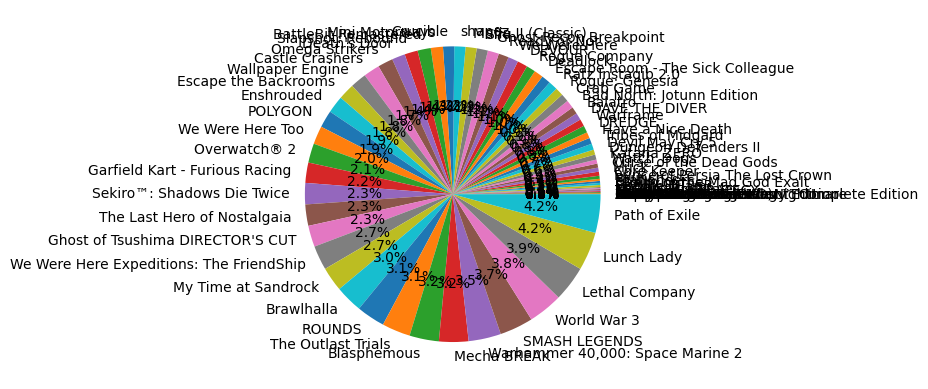

In [26]:
plot = plt.pie(games_backlog['playtime(hrs)'], labels=games_backlog['name'], autopct='%1.1f%%')
plot

Insight 2: Top 10 most games played from my library

      app_id                 name                                  img_icon  \
26    386360                SMITE  7ed9de7bbfab9accb81e47b84943e7478baf2f3a   
152  2767030        Marvel Rivals  839b4712925b95702ca56e0c4d399adf54f4d617   
69   1091500       Cyberpunk 2077  42b9b33fa0f0d997beb299c6157592a8fe7d8f68   
52    858460  SMITE - Public Test  20e160ebdeddbb45f1066f62797cee2dff94da95   
75   1172470         Apex Legends  6cc35932af780289ae3d8d5cdbfe9cd545decad2   

     playtime(hrs) last_played  
26          4867.9  2024-11-26  
152          254.8  2025-05-30  
69           101.2  2023-12-23  
52            90.6  2023-01-22  
75            81.5  2022-12-11  


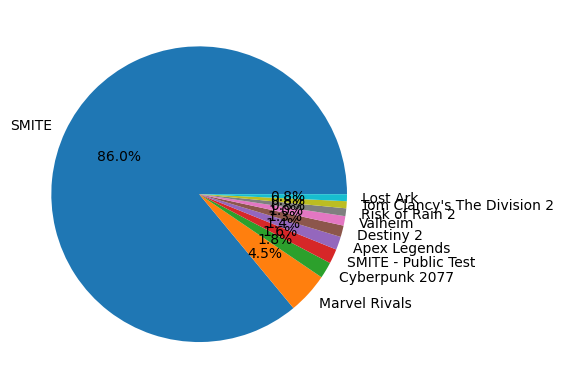

In [28]:
top_10_games = df.nlargest(10, 'playtime(hrs)')
print(top_10_games.head())

top_10_plot = plt.pie(top_10_games['playtime(hrs)'], labels=top_10_games['name'], autopct='%1.1f%%' )